# EDA Deputados Estaduais

**Create em:** 29/04/2022

**Update at:** 03/05/2022

**Objetivo**: 
+ Analisar dados e informaçôes sobre os deputados estaduais da bahai na eleiçâo de 2018, relacionando os fatores que infleunciam em seus votos. 
+ Analisar correlaçâo entre informações pessoais e dinheiro de camapnha com seus votos e se venceu ou não a eleição

# Import Datasets

In [1]:
import plotly.express as px
import pandas as pd
import barkion as bk
import matplotlib.pyplot as plt
import sklearn
import seaborn as sns
from math import ceil


pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
pd.options.display.float_format = '{:.2f}'.format

In [2]:
df_deputado_tse = pd.read_csv('./deputado_estadual_tse.csv', sep=';')
df_deputado_gazeta = pd.read_csv('./deputado_gazeta_info.csv', sep=';')
display(df_deputado_tse.head(3))
print(len(df_deputado_tse))
display(df_deputado_gazeta.head(3))
print(len(df_deputado_gazeta))

nrPartido                         nomePartido siglaPartido  idCandidato  totalDespesasContratadas  totalDespesasPagas  totalRecebido  totalFinanceiro       idIBGE  nrCandidato
0         31  Partido Humanista da Solidariedade          PHS  50000606390                       NaN                 NaN            NaN              NaN  50000606390        31168
1         15    Movimento Democrático Brasileiro          MDB  50000608091                 150472.79           150472.79      170500.00        150500.00  50000608091        15153
2         11                Partido Progressista           PP  50000605231                 177397.18           177397.18      198968.60        177413.60  50000605231        11111

643


deputado_url  eleito   votes votes%                                  votes_by_city_url                                                img                            nomeCompleto                                               desc   Nome na urna       Sexo    Idade Data de nascimento             Ocupação      Grau de instrução   Estado Civil Cor/Raça Município de nascimento  Número Situação da candidatura Estado                           Partido                     Coligação                                         Composição
0  joao-isidorio-70000  Eleito  110540  1,59%  https://especiais.gazetadopovo.com.br/eleicoes...  https://cdn-eleicoes.gazetadopovo.com.br/fotos...            Joao Paulo Santos de Santana  Casado(a),  Cantor e Compositor,       nascido...  Joao Isidorio  Masculino  30 anos         26/01/1992  Cantor e Compositor  Ensino Médio completo      Casado(a)   Branca             Candeias-BA   70000                Deferido  BAHIA                   AVANTE - AVANTE  FORÇA DO TRABALHO PELA BAHIA  PT / PMB / PSD / PR / PDT / PODE / PRP / PP / ...
1      rosemberg-13444  Eleito  101945  1,46%  https://especiais.gazetadopovo.com.br/eleicoes...  https://cdn-eleicoes.gazetadopovo.com.br/fotos...             Rosemberg Evangelista Pinto  Divorciado(a),  Deputado,       nascido  em 14...      Rosemberg  Masculino  66 anos         14/04/1956             Deputado      Superior completo  Divorciado(a)   Branca              Itororo-BA   13444                Deferido  BAHIA    PT - Partido dos Trabalhadores  FORÇA DO TRABALHO PELA BAHIA  PT / PMB / PSD / PR / PDT / PODE / PRP / PP / ...
2  diego-coronel-55255  Eleito  100274  1,44%  https://especiais.gazetadopovo.com.br/eleicoes...  https://cdn-eleicoes.gazetadopovo.com.br/fotos...  Diego Henrique Silva Cerqueira Martins  Casado(a),  Empresário,       nascido  em 22/0...  Diego Coronel  Masculino  39 anos         22/01/1983           Empresário  Ensino Médio completo      Casado(a)   Branca     Coração de Maria-BA   55255                Deferido  BAHIA  PSD - Partido Social Democrático  FORÇA DO TRABALHO PELA BAHIA  PT / PMB / PSD / PR / PDT / PODE / PRP / PP / ...

607


In [3]:
df_deputado_info =  pd.merge(
    df_deputado_tse, df_deputado_gazeta, how="inner", left_on='nrCandidato', right_on='Número'
)
print(len(df_deputado_info))

610


Houve uma pertda de deputados no merge, mas pode ser despresível

In [4]:
df_deputado_info.head(1)

nrPartido                         nomePartido siglaPartido  idCandidato  totalDespesasContratadas  totalDespesasPagas  totalRecebido  totalFinanceiro       idIBGE  nrCandidato            deputado_url          eleito  votes votes%                                  votes_by_city_url                                                img                 nomeCompleto                                               desc      Nome na urna       Sexo    Idade Data de nascimento                               Ocupação      Grau de instrução Estado Civil Cor/Raça Município de nascimento  Número Situação da candidatura Estado                                   Partido     Coligação              Composição
0         31  Partido Humanista da Solidariedade          PHS  50000606390                       NaN                 NaN            NaN              NaN  50000606390        31168  abraao-joviniano-31168  Não foi eleito    700  0,01%  https://especiais.gazetadopovo.com.br/eleicoes...  https://cdn-eleicoes.gazetadopovo.com.br/fotos...  Abraao Joviniano dos Santos  Casado(a),  Auxiliar de Escritório e Assemelha...  Abraao Joviniano  Masculino  53 anos         15/05/1968  Auxiliar de Escritório e Assemelhados  Ensino Médio completo    Casado(a)    Parda             Salvador-BA   31168                Deferido  BAHIA  PHS - Partido Humanista da Solidariedade  RENOVA BAHIA  PHS / PPS / PRTB / PSL

# Snippets

In [5]:
def eda_categ_feat_desc_plot(series_categorical, title = "", fix_labels=False, rotate=False, fontsize=11):
    """Generate 2 plots: barplot with quantity and pieplot with percentage. 
       @series_categorical: categorical series
       @title: optional
       @fix_labels: The labes plot in barplot in sorted by values, some times its bugs cuz axis ticks is alphabethic
           if this happens, pass True in fix_labels
       @bar_format: pass {:,.0f} to int
    """
    series_name = series_categorical.name
    val_counts = series_categorical.value_counts()
    val_counts.name = 'quantity'
    val_percentage = series_categorical.value_counts(normalize=True)
    val_percentage.name = "percentage"
    val_concat = pd.concat([val_counts, val_percentage], axis = 1)
    val_concat.reset_index(level=0, inplace=True)
    val_concat = val_concat.rename( columns = {'index': series_name} )
    
    fig, ax = plt.subplots(figsize = (12,4), ncols=2, nrows=1) # figsize = (width, height)
    if(title != ""):
        fig.suptitle(title, fontsize=18)
        fig.subplots_adjust(top=0.8)
    # barplot
    s = sns.barplot(x=series_name, y='quantity', data=val_concat, ax=ax[0])
    if(fix_labels):
        val_concat = val_concat.sort_values(series_name).reset_index()
    ## Insert numbers
    for index, row in val_concat.iterrows():
        s.text(row.name, row['quantity'], '{:,d}'.format(int(row['quantity'])), color='black', ha="center")
    ## rotate
    if(rotate):
        s.set_xticklabels(s.get_xticklabels(), rotation=45, horizontalalignment='right')
    # pi plot
    s2 = val_concat.plot.pie(y='percentage', autopct=lambda value: '{:.2f}%'.format(value),
                             labels=val_concat[series_name].tolist(), legend=None, ax=ax[1],
                             title="Percentage Plot", textprops={'fontsize': fontsize})

    ax[1].set_ylabel('')
    ax[0].set_title('Quantity Plot')

    plt.show()

In [6]:
def describe_y_classify_by_cat_feat(mydf, x, y, title='', 
                                    classify_content='--', 
                                    labels=['Death', 'Survived'],
                                    vertical=False):
    """
    Generate one barplot with quantity and len(x.unique()) pie plots with percentage of x by class of y.unique()
    @classify_content : string that is the meaning of y
    @labels : start from 0, is the meanign of y value
    18/04/2022: Fix bug de quanto nao tinha categoria alem 
        de colcoar para modo vertical
    """
    
    # Create DataSet
    df1 = mydf.groupby([x,y]).count().reset_index()
    a_column = df1.columns[2]
    df1 = df1.rename({a_column: "quantity"}, axis=1)
    
    # pre-processing df1 to fix bugs
    df1 = df1[ [x, y, 'quantity']]
    all_possibilities = [ (x1,y1) 
                         for x1 in df1[x].unique().tolist() 
                         for y1 in df1[y].unique().tolist() 
                        ]
    count = -1
    for xval, yval in all_possibilities:
        if( not ((df1[x] == xval) & (df1[y] == yval) ).any()):
            df1.loc[count] = [xval, yval, 0]
            count -= 1
    df1 = df1.sort_values([x,y]).reset_index(drop=True)
    
    # continue
    alist = df1['quantity'].tolist()
    unique_values_x = mydf[x].unique().tolist()
    unique_values_x.sort()
    len_unique_values_y = len(mydf[y].unique().tolist())
    
    # Create Fig and Axes and Bar Plot
    if(vertical):
        f, ax = plt.subplots(nrows=ceil((len(unique_values_x)+1)/2),
                             ncols=2, figsize=(50, 50), sharex=False)
        s = sns.barplot(x=x, y='quantity', hue=y, data=df1, ax=ax[0][0])
    else:
        f, ax = plt.subplots(ncols=len(unique_values_x)+1, figsize=(18, 5), sharex=False)
        s = sns.barplot(x=x, y='quantity', hue=y, data=df1, ax=ax[0])
    f.suptitle(title, fontsize=18)
    
    # write on barplot
    count, by_hue = 0, 0
    for index, row in df1.iterrows():
        axis_x = count - 0.20 if index % 2 == 0 else count + 0.20
        by_hue += 1
        if(by_hue == len_unique_values_y):
            count += 1
            by_hue = 0
        s.text(axis_x, row['quantity'], '{:,d}'.format(int(row['quantity'])),
               color='black', ha="center")
    
    if(vertical):
        row_counter, col_counter, hue_counter = 0, 1, 0
        for i in range(len(unique_values_x)):
            df1.query(' `{}` == "{}"'.format(x, unique_values_x[i])).plot.pie(
                y='quantity', figsize=(18, 14), autopct='%1.2f%%',
                labels = ['{} = {}'.format(labels[0], str(alist[i+hue_counter])),
                          '{} = {}'.format(labels[1], str(alist[i+hue_counter+1]))],
                title='{} {} {} (Total = {})'.format(
                    x, unique_values_x[i], classify_content ,str(alist[i] + alist[i+1])),
                ax=ax[row_counter][col_counter],
                labeldistance=None, textprops={'fontsize': 14})
            row_counter = row_counter + 1 if col_counter == 1 else row_counter
            col_counter = col_counter + 1 if col_counter == 0 else 0
            hue_counter += 1

    else:
        hue_count = 0
        for i in range(len(unique_values_x)):
            df1.query(' `{}` == "{}"'.format(x, unique_values_x[i])).plot.pie(
                y='quantity', figsize=(18, 5), autopct='%1.2f%%',
                labels = ['{} = {}'.format(labels[0], str(alist[i+hue_count])),
                          '{} = {}'.format(labels[1], str(alist[i+hue_count+1]))],
                title='{} {} {} (Total = {})'.format(
                    x, unique_values_x[i], classify_content ,str(alist[i] + alist[i+1])),
                ax=ax[i+1],
                labeldistance=None, textprops={'fontsize': 14})
            hue_count += 1
    plt.show()
#     return df1
    
# describe_y_classify_by_cat_feat(df_deputado_info,
#     'Cor/Raça', 'eleito',title="cor-eleito",
#     classify_content='de',labels=['Eleito', 'NaoEleito'],
#     vertical=True)

In [7]:
def df_describe_y_class_binary_by_cat_feats(adf, x_column, y, positive_y):
    """
    Cria DataFrame supremo que mostra a relaçâod e valores categoricos de 
    uma feat ou mais para com um atributo classificado binario
    ==> x_column pode ser tanto LIST QUANTO UM UNICO ATRIBUTO
    """
    mydf = adf[x_column].value_counts()
    mydf = pd.concat((mydf,
                      adf[x_column].value_counts(normalize=True),
                      adf[adf[y] == positive_y][x_column].value_counts()),
                      axis=1)
    mydf = mydf.fillna(0.0)
    mydf = mydf.set_axis(
        ['qtd_total', 'percentage_total', 'qtd_yes'], axis='columns')
    def divide_cols(row):
        if(row['qtd_yes'] == 0.0):
            return 0.0
        return row['qtd_yes'] / row['qtd_total']
    mydf['qtd_no'] = mydf.apply(
        lambda row: row['qtd_total'] - int(row['qtd_yes']), axis=1)
    mydf['percentage_val_yes'] = mydf.apply(
        lambda row: divide_cols(row), axis=1)
    mydf['percentage_val_no'] = mydf.apply(
        lambda row: 1.0 - row['percentage_val_yes'], axis=1)
    mydf = mydf.sort_values(by='percentage_val_yes', ascending=False)
    # convert types
    for c in ['qtd_yes','qtd_no']:
        mydf[c] = mydf[c].apply(int)
    for c in ['percentage_total','percentage_val_yes','percentage_val_no']:
        mydf[c] = mydf[c].apply(lambda x: '{:.2%}'.format(x))
    if isinstance(x_column, list):
        return mydf.reset_index()
    else:
        return mydf.reset_index().rename(
            columns={ 'index': x_column})
# df_describe_y_class_binary_by_cat_feats(df, 'SUB-ORIGEM', 'VENDIDO', 'SIM')

# Pre-processing Infos

In [8]:
df_deputado_info['eleito'].value_counts()

Não foi eleito    374
Não foi eleita    173
Eleito             53
Eleita             10
Name: eleito, dtype: int64

In [9]:
df_deputado_info['eleito'] = df_deputado_info['eleito'].replace({
    'Eleita': 'Eleito',
    'Não foi eleita': 'Não foi eleito'
})


In [10]:
df_deputado_info['Idade'] = df_deputado_info['Idade'].apply(lambda x: int(x.replace(' anos','')))

In [11]:
df_deputado_info.head(1).columns

Index(['nrPartido', 'nomePartido', 'siglaPartido', 'idCandidato', 'totalDespesasContratadas', 'totalDespesasPagas', 'totalRecebido', 'totalFinanceiro', 'idIBGE', 'nrCandidato', 'deputado_url', 'eleito', 'votes', 'votes%', 'votes_by_city_url', 'img', 'nomeCompleto', 'desc', 'Nome na urna', 'Sexo', 'Idade', 'Data de nascimento', 'Ocupação', 'Grau de instrução', 'Estado Civil', 'Cor/Raça', 'Município de nascimento', 'Número', 'Situação da candidatura', 'Estado', 'Partido', 'Coligação', 'Composição'], dtype='object')

## Deletar situaçâo indeferido

Quem tem situaçâo indeferida tem 0 votos

In [197]:
df_deputado_info['Situação da candidatura'].value_counts()

Deferido      582
Indeferido     28
Name: Situação da candidatura, dtype: int64

In [203]:
df_deputado_info.query(' `Situação da candidatura` == "Indeferido" ')

nrPartido                               nomePartido   siglaPartido  idCandidato  totalDespesasContratadas  totalDespesasPagas  totalRecebido  totalFinanceiro       idIBGE  nrCandidato                deputado_url          eleito  votes votes%                                  votes_by_city_url                                                img                    nomeCompleto                                               desc          Nome na urna       Sexo  Idade Data de nascimento                         Ocupação        Grau de instrução   Estado Civil  Cor/Raça    Município de nascimento  Número Situação da candidatura Estado                                          Partido                        Coligação                                         Composição  VotosPor1Real
8           28                                       NaN            NaN  50000628475                       NaN                 NaN            NaN              NaN  50000628475        28999         oliver-santos-28999  Não foi eleito      0  0,00%  https://especiais.gazetadopovo.com.br/eleicoes...  https://cdn-eleicoes.gazetadopovo.com.br/fotos...          Ademir Santos Oliveira  Solteiro(a),  Comerciante,       nascido  em 0...         Oliver Santos  Masculino     43         01/11/1978                      Comerciante      Superior incompleto    Solteiro(a)     Parda                Salvador-BA   28999              Indeferido  BAHIA  PRTB - Partido Renovador Trabalhista Brasileiro                     RENOVA BAHIA                             PHS / PPS / PRTB / PSL            NaN
9           28  Partido Renovador Trabalhista Brasileiro           PRTB  50000628452                       NaN                 NaN            NaN              NaN  50000628452        28999         oliver-santos-28999  Não foi eleito      0  0,00%  https://especiais.gazetadopovo.com.br/eleicoes...  https://cdn-eleicoes.gazetadopovo.com.br/fotos...          Ademir Santos Oliveira  Solteiro(a),  Comerciante,       nascido  em 0...         Oliver Santos  Masculino     43         01/11/1978                      Comerciante      Superior incompleto    Solteiro(a)     Parda                Salvador-BA   28999              Indeferido  BAHIA  PRTB - Partido Renovador Trabalhista Brasileiro                     RENOVA BAHIA                             PHS / PPS / PRTB / PSL            NaN
28          50            Partido Socialismo e Liberdade           PSOL  50000600931                  10425.15            10425.15       11111.11         10711.11  50000600931        50600     alfredo-boa-sorte-50600  Não foi eleito      0  0,00%  https://especiais.gazetadopovo.com.br/eleicoes...  https://cdn-eleicoes.gazetadopovo.com.br/fotos...        Alfredo Boa Sorte Junior  Casado(a),  Médico,       nascido  em 21/07/19...     Alfredo Boa Sorte  Masculino     63         21/07/1958                           Médico        Superior completo      Casado(a)    Branca                Guanambi-BA   50600              Indeferido  BAHIA            PSOL - Partido Socialismo e Liberdade                             PSOL                                                 **           0.00
57          36               Partido Trabalhista Cristão            PTC  50000622615                       NaN                 NaN            NaN              NaN  50000622615        36910                arieli-36910  Não foi eleito      0  0,00%  https://especiais.gazetadopovo.com.br/eleicoes...  https://cdn-eleicoes.gazetadopovo.com.br/fotos...            Arieli Argolo Soares  Solteiro(a),        nascida  em 13/12/1984  em...                Arieli   Feminino     37         13/12/1984                           Outros    Ensino Médio completo    Solteiro(a)     Preta                Salvador-BA   36910              Indeferido  BAHIA                PTC - Partido Trabalhista Cristão  Time do Trabalho do Povo Baiano                                          PTC / PMN            NaN
74          44          Partido Republicano Progressista         

In [201]:
df_deputado_info.query(
    ' `Situação da candidatura` == "Indeferido" ')['votes'].value_counts()

0    28
Name: votes, dtype: int64

In [202]:
df_deputado_info.query(
    '`Situação da candidatura` == "Indeferido" ')['totalRecebido'].value_counts()

100.00      3
11111.11    1
20000.00    1
50000.00    1
663.08      1
3000.00     1
6101.00     1
612.85      1
1300.00     1
1917.00     1
4000.00     1
56959.00    1
5222.50     1
1500.00     1
1725.00     1
750.00      1
3002.50     1
Name: totalRecebido, dtype: int64

# Análise Exploratória de Dados - EDA

## Quem foi eleito?

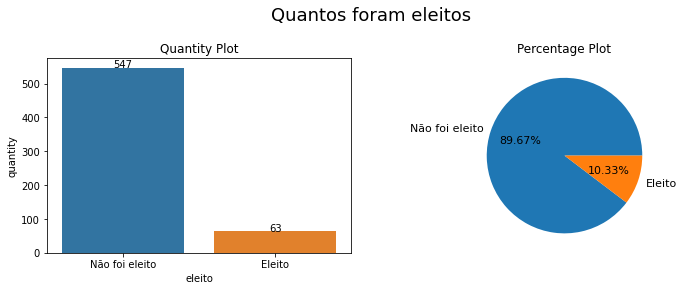

In [12]:
eda_categ_feat_desc_plot(df_deputado_info['eleito'],
                         title = "Quantos foram eleitos",
                         )

## Informações Pessoais - MonoAtributo

### Cor/Raça

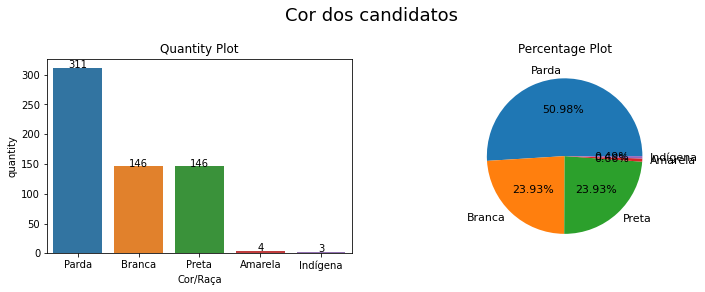

In [13]:
eda_categ_feat_desc_plot(df_deputado_info['Cor/Raça'],
                         title = "Cor dos candidatos",
                         )

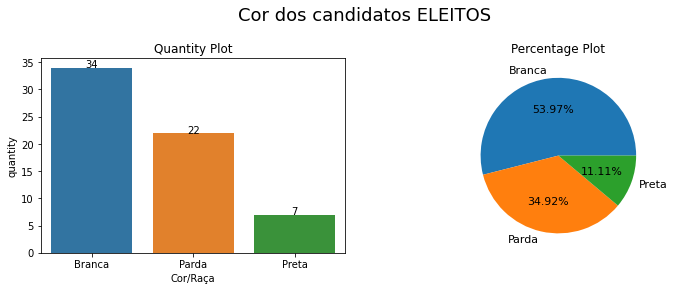

In [14]:
eda_categ_feat_desc_plot(df_deputado_info.query('eleito == "Eleito"')['Cor/Raça'],
                         title = "Cor dos candidatos ELEITOS",
                         )

In [15]:
fig = px.histogram(df_deputado_info, x="Cor/Raça", color="eleito", title="Long-Form Input")
fig.show()

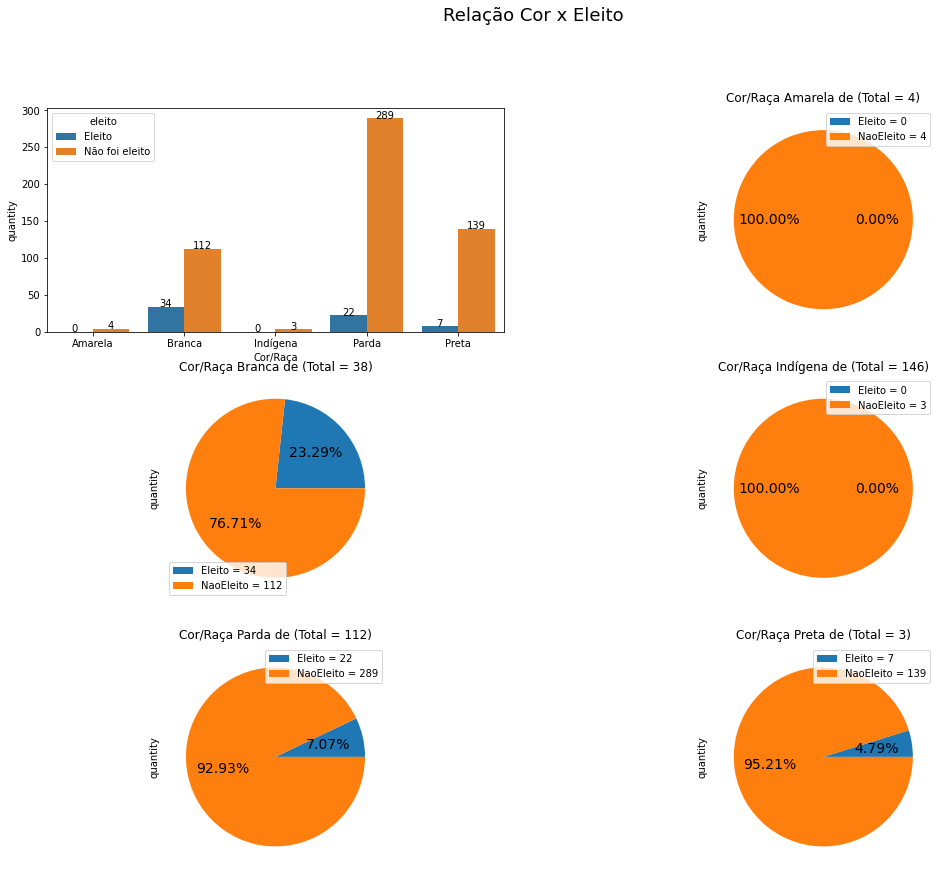

In [16]:
describe_y_classify_by_cat_feat(df_deputado_info,
                                'Cor/Raça', 'eleito',
                                title="Relação Cor x Eleito", 
                                classify_content='de',
                                labels=['Eleito', 'NaoEleito'],
                               vertical=True)

**Tabela Final relação Cor x Eleito**

In [17]:
df_describe_y_class_binary_by_cat_feats(df_deputado_info, 'Cor/Raça', 'eleito', 'Eleito')

Cor/Raça  qtd_total percentage_total  qtd_yes  qtd_no percentage_val_yes percentage_val_no
0    Branca        146           23.93%       34     112             23.29%            76.71%
1     Parda        311           50.98%       22     289              7.07%            92.93%
2     Preta        146           23.93%        7     139              4.79%            95.21%
3   Amarela          4            0.66%        0       4              0.00%           100.00%
4  Indígena          3            0.49%        0       3              0.00%           100.00%

### Partido

In [18]:
fig = px.histogram(df_deputado_info, x="siglaPartido", color="eleito", title="Long-Form Input")
fig.show()

In [19]:
df_describe_y_class_binary_by_cat_feats(df_deputado_info, 'siglaPartido', 'eleito', 'Eleito')

siglaPartido  qtd_total percentage_total  qtd_yes  qtd_no percentage_val_yes percentage_val_no
0             PSD         13            2.13%        9       4             69.23%            30.77%
1          AVANTE          2            0.33%        1       1             50.00%            50.00%
2              PP         15            2.46%        7       8             46.67%            53.33%
3              PT         26            4.27%       10      16             38.46%            61.54%
4             PDT          9            1.48%        3       6             33.33%            66.67%
5             PSB         12            1.97%        4       8             33.33%            66.67%
6             DEM         28            4.60%        7      21             25.00%            75.00%
7            PSDB         13            2.13%        3      10             23.08%            76.92%
8             PRP          5            0.82%        1       4             20.00%            80.00%
9              PR          6            0.99%        1       5             16.67%            83.33%
10            PRB         17            2.79%        2      15             11.76%            88.24%
11        PC do B         44            7.22%        5      39             11.36%            88.64%
12           PODE          9            1.48%        1       8             11.11%            88.89%
13            PSL         20            3.28%        2      18             10.00%            90.00%
14            PSC         39            6.40%        3      36              7.69%            92.31%
15            MDB         23            3.78%        1      22              4.35%            95.65%
16            PHS         24            3.94%        1      23              4.17%            95.83%
17           PSOL         44            7.22%        1      43              2.27%            97.73%
18          PATRI         63           10.34%        1      62              1.59%            98.41%
19            PMN          3            0.49%        0       3              0.00%           100.00%
20           PRTB          9            1.48%        0       9              0.00%           100.00%
21           PROS          4            0.66%        0       4              0.00%           100.00%
22            PMB          1            0.16%        0       1              0.00%           100.00%
23            PTC         64           10.51%        0      64              0.00%           100.00%
24            PPS         10            1.64%        0      10              0.00%           100.00%
25            PTB         11            1.81%        0      11              0.00%           100.00%
26            PPL         11            1.81%        0      11              0.00%           100.00%
27             PV         12            1.97%        0      12              0.00%           100.00%
28           REDE         16            2.63%        0      16              0.00%           100.00%
29             DC         25            4.11%        0      25              0.00%           100.00%
30  SOLIDARIEDADE         30            4.93%        0      30              0.00%           100.00%
31            PCO          1            0.16%        0       1              0.00%           100.00%

### Sexo

In [20]:
fig = px.histogram(df_deputado_info, x="Sexo", color="eleito", title="Long-Form Input")
fig.show()

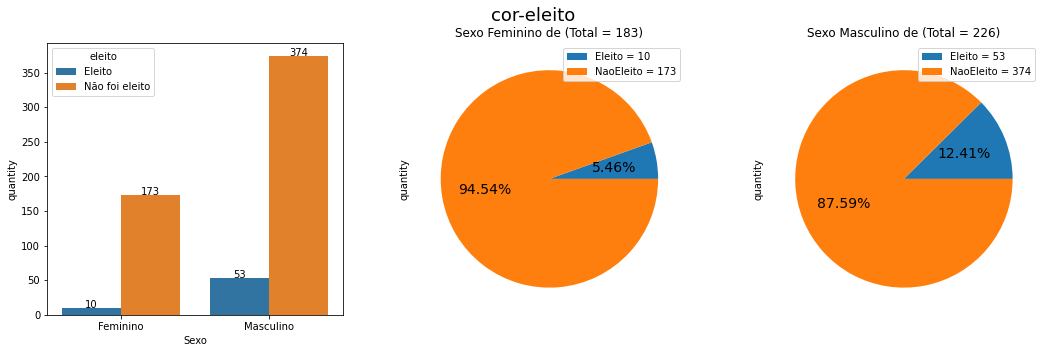

In [21]:
describe_y_classify_by_cat_feat(df_deputado_info,
                                'Sexo', 'eleito',
                                title="cor-eleito", 
                                classify_content='de',
                                labels=['Eleito', 'NaoEleito'])

In [22]:
df_describe_y_class_binary_by_cat_feats(df_deputado_info, 'Sexo', 'eleito', 'Eleito')

Sexo  qtd_total percentage_total  qtd_yes  qtd_no percentage_val_yes percentage_val_no
0  Masculino        427           70.00%       53     374             12.41%            87.59%
1   Feminino        183           30.00%       10     173              5.46%            94.54%

### Idade

In [23]:
def describe_y_classify_numeric_feature(mydf, x, y, title='', with_swarmp=False):
    f, (ax1, ax2, ax3) = plt.subplots(ncols=3, figsize=(18, 7), sharex=False)
    # Box and Violin Plots
    sns.boxplot(y=x, x=y, data=mydf, ax=ax1)
    sns.violinplot(y=x, x=y, data=mydf, ax=ax2)
    if(with_swarmp):
        sns.swarmplot(x=y, y=x, data=mydf, ax=ax2, palette='rocket')
    # HistogramPlot
    sns.histplot(mydf, x=x, kde=True, hue=y, ax=ax3)
    # Set Titles
    if(not title):
        f.suptitle('{} by {}'.format(y,x), fontsize=24)
    else:
        f.suptitle(title, fontsize=24)
    ax1.set_title("BoxPlot", fontsize=20)
    ax2.set_title("ViolinPlot", fontsize=20)
    ax3.set_title("HistogramPlot", fontsize=20)
    # font-size of x and y label
    ax1.set_xlabel(x, fontsize = 16)
    ax1.set_ylabel(y, fontsize = 16)
    ax2.set_xlabel(x, fontsize = 16)
    ax2.set_ylabel(y, fontsize = 16)
    ax3.set_xlabel(x, fontsize = 16)
    ax3.set_ylabel('Count', fontsize = 16)
    # size font of axis
    ax1.tick_params(labelsize=14)
    ax2.tick_params(labelsize=14)
    ax3.tick_params(labelsize=14)
    plt.show()
    
# describe_y_classify_numeric_feature(df, x='fare', y='survived')

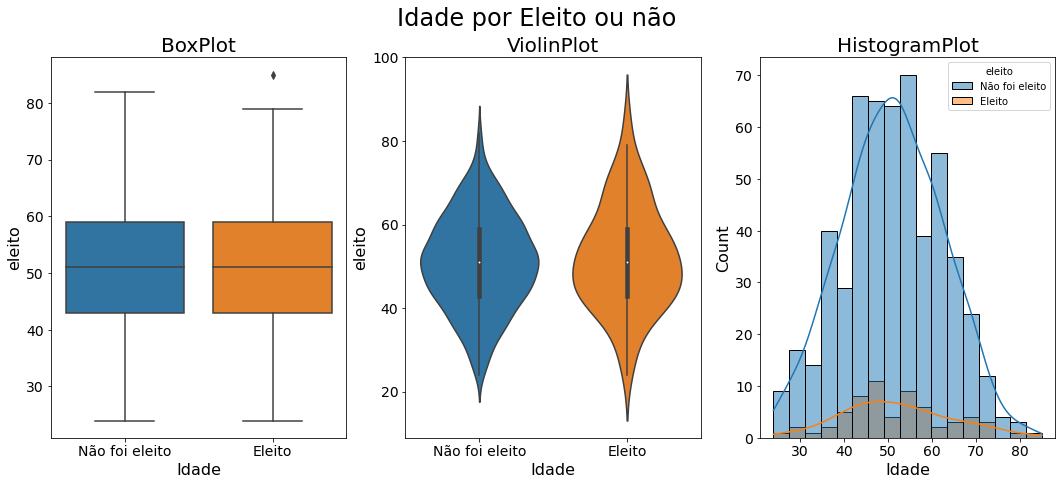

In [24]:
describe_y_classify_numeric_feature(
    df_deputado_info, 'Idade', 'eleito', 'Idade por Eleito ou não')

### Estado Civil

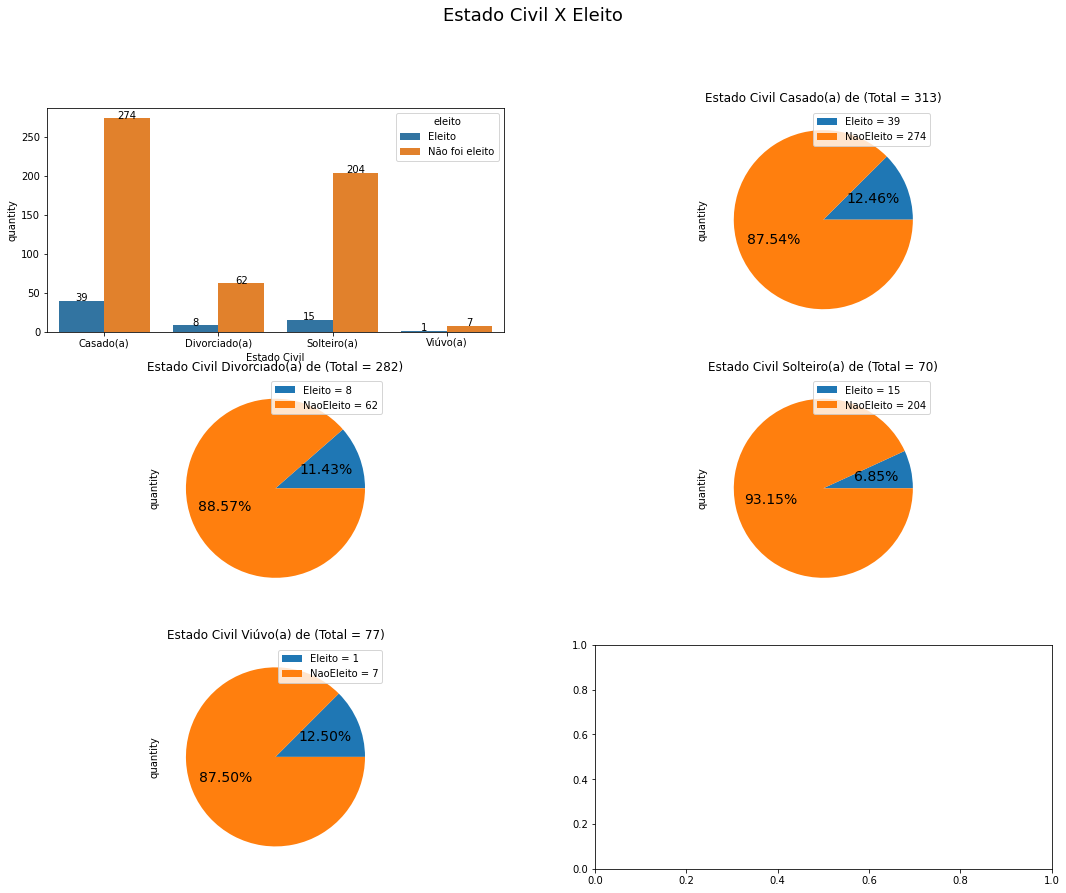

In [25]:
describe_y_classify_by_cat_feat(df_deputado_info,
                                'Estado Civil', 'eleito',
                                title="Estado Civil X Eleito", 
                                classify_content='de',
                                labels=['Eleito', 'NaoEleito'],
                               vertical=True)

In [26]:
df_describe_y_class_binary_by_cat_feats(df_deputado_info, 'Estado Civil', 'eleito', 'Eleito')

Estado Civil  qtd_total percentage_total  qtd_yes  qtd_no percentage_val_yes percentage_val_no
0       Viúvo(a)          8            1.31%        1       7             12.50%            87.50%
1      Casado(a)        313           51.31%       39     274             12.46%            87.54%
2  Divorciado(a)         70           11.48%        8      62             11.43%            88.57%
3    Solteiro(a)        219           35.90%       15     204              6.85%            93.15%

### Ocupação

In [221]:
# get 100 top
list_alfa = df_deputado_info['Ocupação'].value_counts().index.tolist()[:10]

In [220]:
df_temp = df_deputado_info[ df_deputado_info['Ocupação'].isin(list_alfa) ]
df_temp

nrPartido                               nomePartido   siglaPartido  idCandidato  totalDespesasContratadas  totalDespesasPagas  totalRecebido  totalFinanceiro       idIBGE  nrCandidato                          deputado_url          eleito   votes votes%                                  votes_by_city_url                                                img                                  nomeCompleto                                               desc                    Nome na urna       Sexo  Idade Data de nascimento                              Ocupação              Grau de instrução   Estado Civil  Cor/Raça      Município de nascimento  Número Situação da candidatura Estado                                          Partido                         Coligação                                         Composição  VotosPor1Real
2           11                      Partido Progressista             PP  50000605231                 177397.18           177397.18      198968.60        177413.60  50000605231        11111                  aderbal-caldas-11111          Eleito   51480  0,74%  https://especiais.gazetadopovo.com.br/eleicoes...  https://cdn-eleicoes.gazetadopovo.com.br/fotos...                          Aderbal Fulco Caldas  Solteiro(a),  Deputado,       nascido  em 18/0...                  Aderbal Caldas  Masculino     79         18/03/1943                              Deputado          Ensino Médio completo    Solteiro(a)    Branca                Crisópolis-BA   11111                Deferido  BAHIA                               PP - Progressistas      FORÇA DO TRABALHO PELA BAHIA  PT / PMB / PSD / PR / PDT / PODE / PRP / PP / ...           0.26
3           51                                  Patriota          PATRI  50000607719                      0.00                0.00        1890.11             0.00  50000607719        51605               adilson-cerqueira-51605  Não foi eleito     348  0,00%  https://especiais.gazetadopovo.com.br/eleicoes...  https://cdn-eleicoes.gazetadopovo.com.br/fotos...                             Adilson Cerqueira  Casado(a),  Aposentado (Exceto Servidor Públic...               Adilson Cerqueira  Masculino     70         25/03/1952  Aposentado (Exceto Servidor Público)  Ensino Fundamental incompleto      Casado(a)     Parda                  Salvador-BA   51605                Deferido  BAHIA                                 PATRI - Patriota  COLIGAÇÃO REDE PATRIOTA DA BAHIA                                       PATRI / REDE           0.18
5           20                    Partido Social Cristão            PSC  50000605136                  32000.00            32000.00       38792.12         32000.00  50000605136        20020                 admilsom-careca-20020  Não foi eleito    2899  0,04%  https://especiais.gazetadopovo.com.br/eleicoes...  https://cdn-eleicoes.gazetadopovo.com.br/fotos...                    Admilson Nascimento Santos  Casado(a),  Vereador,       nascido  em 12/12/...                 Admilsom Careca  Masculino     50         12/12/1971                              Vereador              Superior completo      Casado(a)     Parda                    Jequié-BA   20020                Deferido  BAHIA                     PSC - Partido Social Cristão                       BAHIA LIVRE                                    PSC / PTB / PPL           0.07
6           55                Partido Social Democrático            PSD  50000607996                 318073.89           318073.89      366820.02        318150.67  50000607996        55111                  adolfo-menezes-55111          Eleito   80817  1,16%  https://especiais.gazetadopovo.com.br/eleicoes...  https://cdn-eleicoes.gazetadopovo.com.br/fotos...            Adolfo Emanuel Monteiro de Menezes  Casado(a),  Deputado,       nascido  em 04/11/...                  Adolfo Menezes  Masculino     63         04/11/1958                              Deputado              Superior completo      Casado(a)    Branca             Campo Formoso-BA   55111 

In [229]:
import plotly.express as px

fig = px.histogram(df_temp,
             x='Ocupação',
             title='Ocupações'
           )

fig.update_xaxes(categoryorder='total descending')
fig.show()

In [230]:
import plotly.express as px

fig = px.histogram(df_temp,
             x='Ocupação',
             title='Ocupações',
            color='eleito'
           )

fig.update_xaxes(categoryorder='total descending')
fig.show()

In [243]:
df_describe_y_class_binary_by_cat_feats(df_deputado_info, 'Ocupação', 'eleito', 'Eleito')

Ocupação  qtd_total percentage_total  qtd_yes  qtd_no percentage_val_yes percentage_val_no
0                                        Comunicólogo          1            0.16%        1       0            100.00%             0.00%
1                                         Historiador          1            0.16%        1       0            100.00%             0.00%
2                                            Deputado         44            7.21%       33      11             75.00%            25.00%
3                                 Cantor e Compositor          2            0.33%        1       1             50.00%            50.00%
4     Corretor de Imóveis, Seguros, Títulos e Valores          4            0.66%        1       3             25.00%            75.00%
5                                          Agricultor          5            0.82%        1       4             20.00%            80.00%
6                                              Médico         21            3.44%        4      17             19.05%            80.95%
7                                          Enfermeiro          6            0.98%        1       5             16.67%            83.33%
8                                    Policial Militar         12            1.97%        2      10             16.67%            83.33%
9                                            Vereador         25            4.10%        4      21             16.00%            84.00%
10                                         Engenheiro          8            1.31%        1       7             12.50%            87.50%
11     Estudante, Bolsista, Estagiário e Assemelhados         11            1.80%        1      10              9.09%            90.91%
12                          Professor de Ensino Médio         23            3.77%        2      21              8.70%            91.30%
13                                           Advogado         28            4.59%        2      26              7.14%            92.86%
14                          Servidor Público Estadual         15            2.46%        1      14              6.67%            93.33%
15                                         Empresário         66           10.82%        4      62              6.06%            93.94%
16                                             Outros        120           19.67%        3     117              2.50%            97.50%
17              Atendente de Lanchonete e Restaurante          1            0.16%        0       1              0.00%           100.00%
18                           Fotógrafo e Assemelhados          1            0.16%        0       1              0.00%           100.00%
19             Ator e Diretor de Espetáculos Públicos          1            0.16%        0       1              0.00%           100.00%
20  Técnico de Obras Civis, Estradas, Saneamento e...          1            0.16%        0       1              0.00%           100.00%
21                             Técnico em Informática          1            0.16%        0       1              0.00%           100.00%
22                            Representante Comercial          1            0.16%        0       1              0.00%           100.00%
23                                            Gerente          1            0.16%        0       1              0.00%           100.00%
24                             Operador de Computador          1            0.16%        0       1              0.00%           100.00%
25                                      Bibliotecário          1            0.16%        0       1              0.00%           100.00%
26                 Técnico em Agronomia e Agrimensura          1            0.16%        0       1              0.00%           100.00%
27               Diretor de Estabelecimento de Ensino          1            0.16%        0       1              0.00%           100.00%
28                                         Industrial          1            0.16%        0       1   

### Grau de Instrução

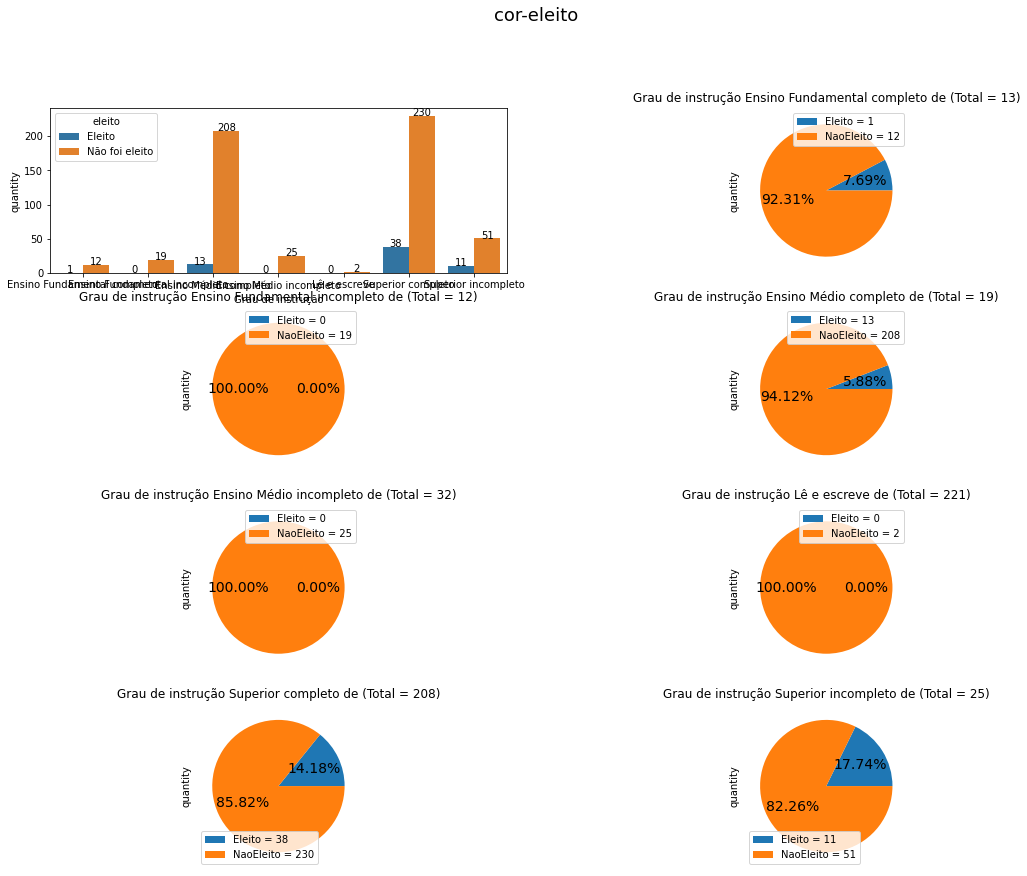

In [27]:
describe_y_classify_by_cat_feat(df_deputado_info,
                                'Grau de instrução', 'eleito',
                                title="cor-eleito", 
                                classify_content='de',
                                labels=['Eleito', 'NaoEleito'],
                               vertical=True)

In [28]:
df_describe_y_class_binary_by_cat_feats(df_deputado_info, 'Grau de instrução', 'eleito', 'Eleito')

Grau de instrução  qtd_total percentage_total  qtd_yes  qtd_no percentage_val_yes percentage_val_no
0            Superior incompleto         62           10.16%       11      51             17.74%            82.26%
1              Superior completo        268           43.93%       38     230             14.18%            85.82%
2    Ensino Fundamental completo         13            2.13%        1      12              7.69%            92.31%
3          Ensino Médio completo        221           36.23%       13     208              5.88%            94.12%
4        Ensino Médio incompleto         25            4.10%        0      25              0.00%           100.00%
5  Ensino Fundamental incompleto         19            3.11%        0      19              0.00%           100.00%
6                   Lê e escreve          2            0.33%        0       2              0.00%           100.00%

### Coligação

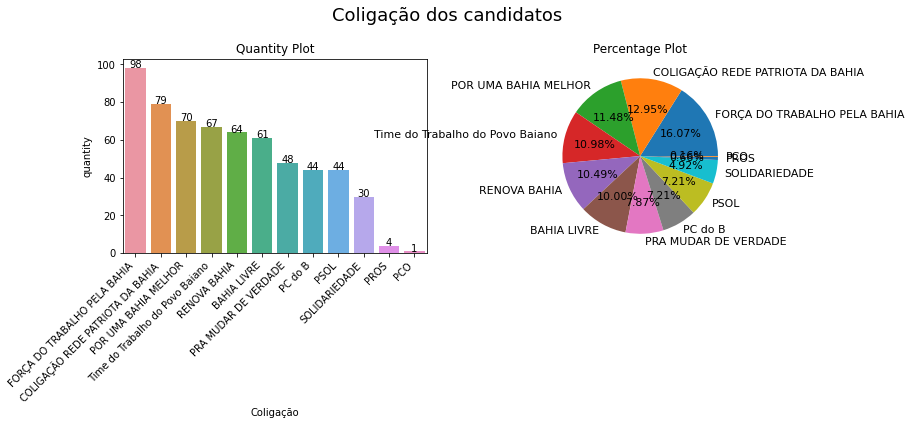

In [143]:
eda_categ_feat_desc_plot(df_deputado_info['Coligação'],
                         title = "Coligação dos candidatos",
                         rotate=True
                         )

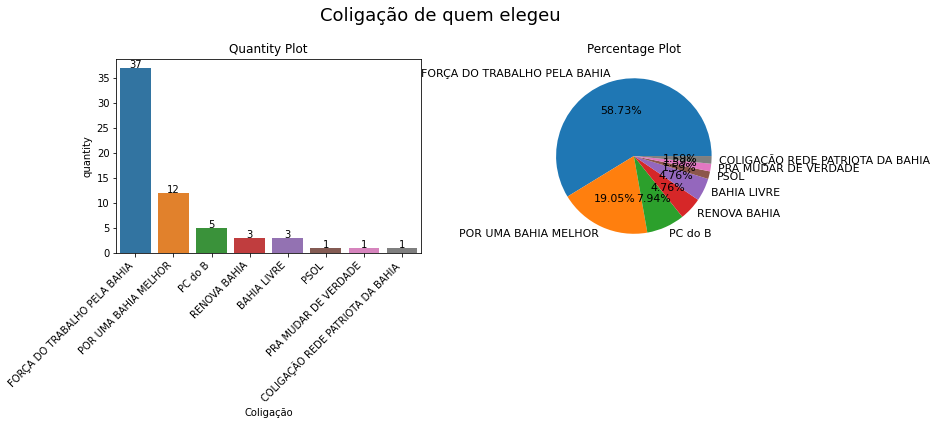

In [142]:
eda_categ_feat_desc_plot(df_deputado_info.query('eleito == "Eleito"')['Coligação'],
                         title = "Coligação de quem elegeu",
                         rotate=True
                         )

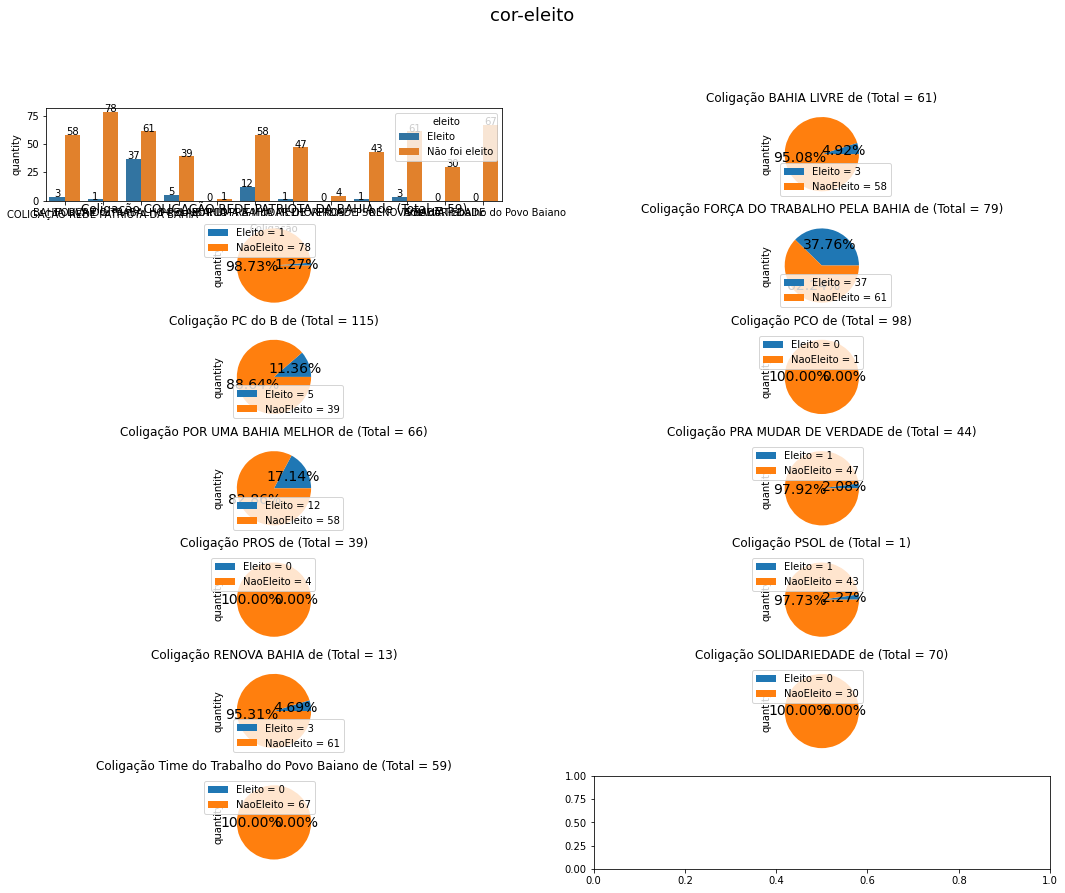

In [139]:
describe_y_classify_by_cat_feat(df_deputado_info,
                                'Coligação', 'eleito',
                                title="cor-eleito", 
                                classify_content='de',
                                labels=['Eleito', 'NaoEleito'],
                               vertical=True)

In [148]:
df_describe_y_class_binary_by_cat_feats(df_deputado_info, 'Coligação', 'eleito', 'Eleito')

Coligação  qtd_total percentage_total  qtd_yes  qtd_no percentage_val_yes percentage_val_no
0       FORÇA DO TRABALHO PELA BAHIA         98           16.07%       37      61             37.76%            62.24%
1               POR UMA BAHIA MELHOR         70           11.48%       12      58             17.14%            82.86%
2                            PC do B         44            7.21%        5      39             11.36%            88.64%
3                        BAHIA LIVRE         61           10.00%        3      58              4.92%            95.08%
4                       RENOVA BAHIA         64           10.49%        3      61              4.69%            95.31%
5                               PSOL         44            7.21%        1      43              2.27%            97.73%
6               PRA MUDAR DE VERDADE         48            7.87%        1      47              2.08%            97.92%
7   COLIGAÇÃO REDE PATRIOTA DA BAHIA         79           12.95%        1      78              1.27%            98.73%
8    Time do Trabalho do Povo Baiano         67           10.98%        0      67              0.00%           100.00%
9                      SOLIDARIEDADE         30            4.92%        0      30              0.00%           100.00%
10                              PROS          4            0.66%        0       4              0.00%           100.00%
11                               PCO          1            0.16%        0       1              0.00%           100.00%

### Composição

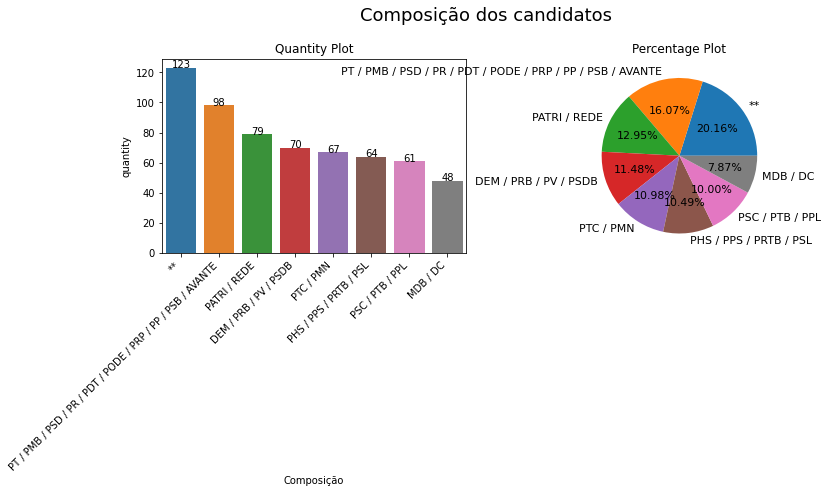

In [145]:
eda_categ_feat_desc_plot(df_deputado_info['Composição'],
                         title = "Composição dos candidatos",
                         rotate=True
                         )

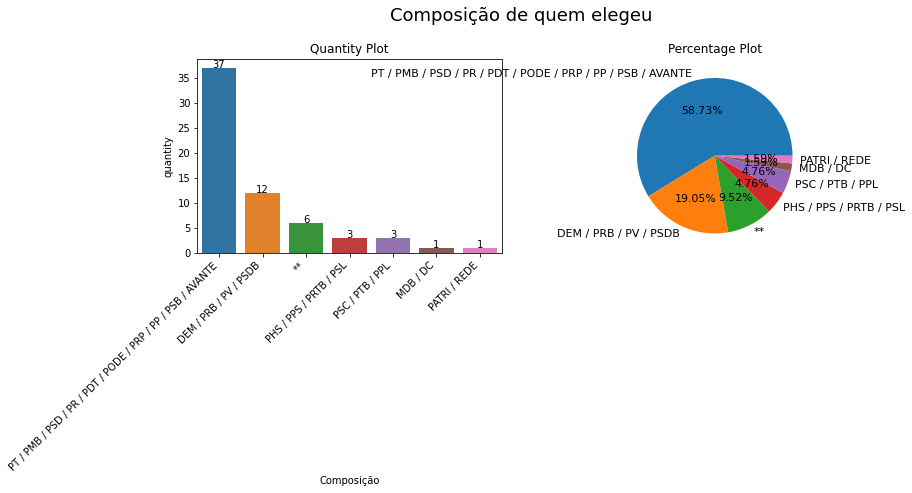

In [146]:
eda_categ_feat_desc_plot(df_deputado_info.query('eleito == "Eleito"')['Composição'],
                         title = "Composição de quem elegeu",
                         rotate=True
                         )

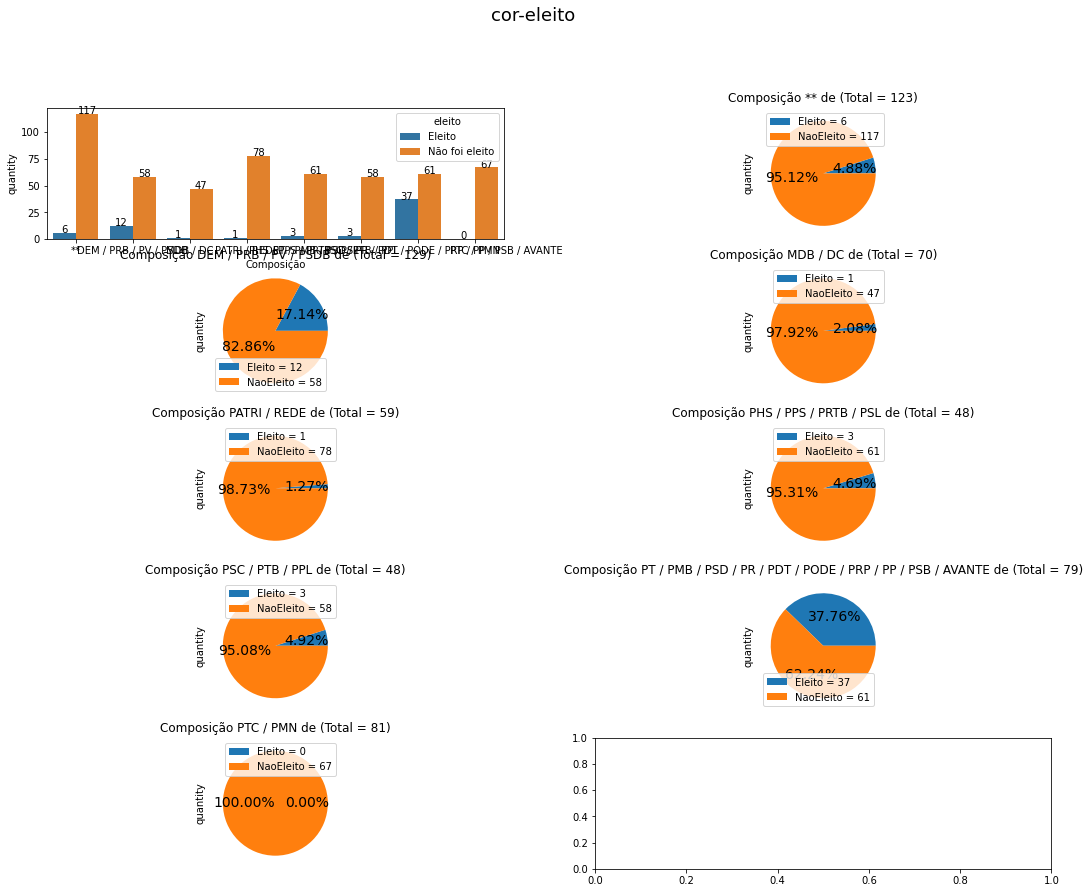

In [147]:
describe_y_classify_by_cat_feat(df_deputado_info,
                                'Composição', 'eleito',
                                title="cor-eleito", 
                                classify_content='de',
                                labels=['Eleito', 'NaoEleito'],
                               vertical=True)

In [149]:
df_describe_y_class_binary_by_cat_feats(df_deputado_info, 'Composição', 'eleito', 'Eleito')

Composição  qtd_total percentage_total  qtd_yes  qtd_no percentage_val_yes percentage_val_no
0  PT / PMB / PSD / PR / PDT / PODE / PRP / PP / ...         98           16.07%       37      61             37.76%            62.24%
1                              DEM / PRB / PV / PSDB         70           11.48%       12      58             17.14%            82.86%
2                                    PSC / PTB / PPL         61           10.00%        3      58              4.92%            95.08%
3                                                 **        123           20.16%        6     117              4.88%            95.12%
4                             PHS / PPS / PRTB / PSL         64           10.49%        3      61              4.69%            95.31%
5                                           MDB / DC         48            7.87%        1      47              2.08%            97.92%
6                                       PATRI / REDE         79           12.95%        1      78              1.27%            98.73%
7                                          PTC / PMN         67           10.98%        0      67              0.00%           100.00%

# EDA - Reelição

Quem tem como 'Ocupação' 'Deputado'

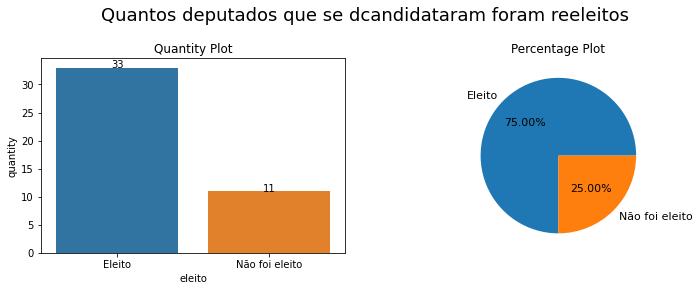

In [232]:
eda_categ_feat_desc_plot(
    df_deputado_info.query('Ocupação == "Deputado" ')['eleito'],
    title = "Quantos deputados que se dcandidataram foram reeleitos",
)

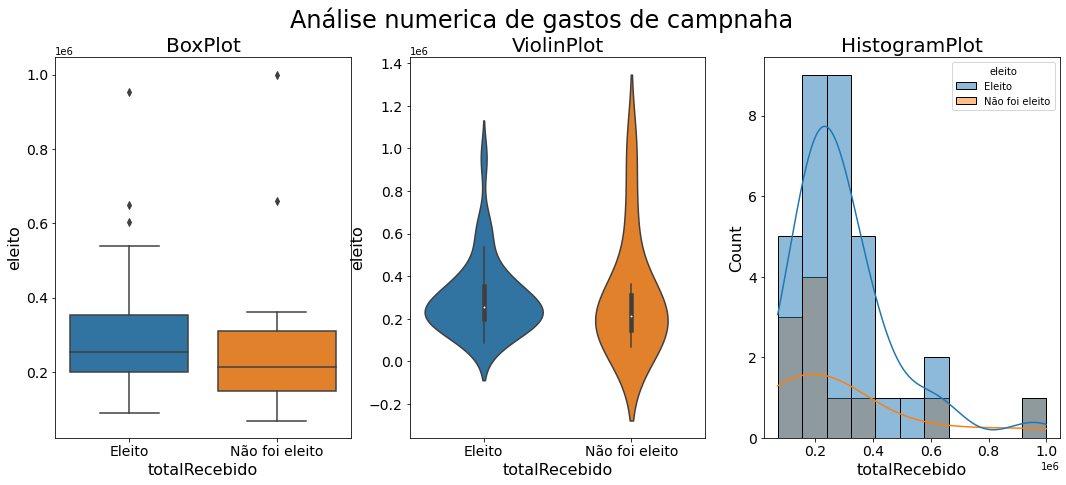

In [233]:
describe_y_classify_numeric_feature(
    df_deputado_info.query('Ocupação == "Deputado" '),
    'totalRecebido', 'eleito', 'Análise numerica de gastos de campnaha')

# EDA - Cross Multi Atributos

## Votor por Cor e Sexo

In [160]:
fig = px.sunburst(df_deputado_info, path=['Cor/Raça', 'Sexo', 'eleito'])
fig.show()

C:\Python310\lib\site-packages\plotly\express\_core.py:1637: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Python310\lib\site-packages\plotly\express\_core.py:1637: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Python310\lib\site-packages\plotly\express\_core.py:1637: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



In [151]:
fig = px.sunburst(df_deputado_info, path=['Cor/Raça', 'Sexo'])
fig.show()

C:\Python310\lib\site-packages\plotly\express\_core.py:1637: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Python310\lib\site-packages\plotly\express\_core.py:1637: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



In [163]:
df_deputado_info.columns

Index(['nrPartido', 'nomePartido', 'siglaPartido', 'idCandidato', 'totalDespesasContratadas', 'totalDespesasPagas', 'totalRecebido', 'totalFinanceiro', 'idIBGE', 'nrCandidato', 'deputado_url', 'eleito', 'votes', 'votes%', 'votes_by_city_url', 'img', 'nomeCompleto', 'desc', 'Nome na urna', 'Sexo', 'Idade', 'Data de nascimento', 'Ocupação', 'Grau de instrução', 'Estado Civil', 'Cor/Raça', 'Município de nascimento', 'Número', 'Situação da candidatura', 'Estado', 'Partido', 'Coligação', 'Composição'], dtype='object')

In [166]:
fig = px.sunburst(df_deputado_info, path=['Partido'], values='votes')
fig.show()

C:\Python310\lib\site-packages\plotly\express\_core.py:1637: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



In [29]:
fig = px.sunburst(df_deputado_info, path=['Cor/Raça', 'Sexo'], values='votes')
fig.show()

C:\Python310\lib\site-packages\plotly\express\_core.py:1637: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Python310\lib\site-packages\plotly\express\_core.py:1637: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



In [150]:
fig = px.sunburst(df_deputado_info, path=['Cor/Raça', 'Sexo'], values='totalRecebido')
fig.show()

C:\Python310\lib\site-packages\plotly\express\_core.py:1637: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Python310\lib\site-packages\plotly\express\_core.py:1637: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



# EDA - Arrecadação

## Histograma Money

**Conclusão**: Para se eleger, é preciso em média de 200 a 400 mil

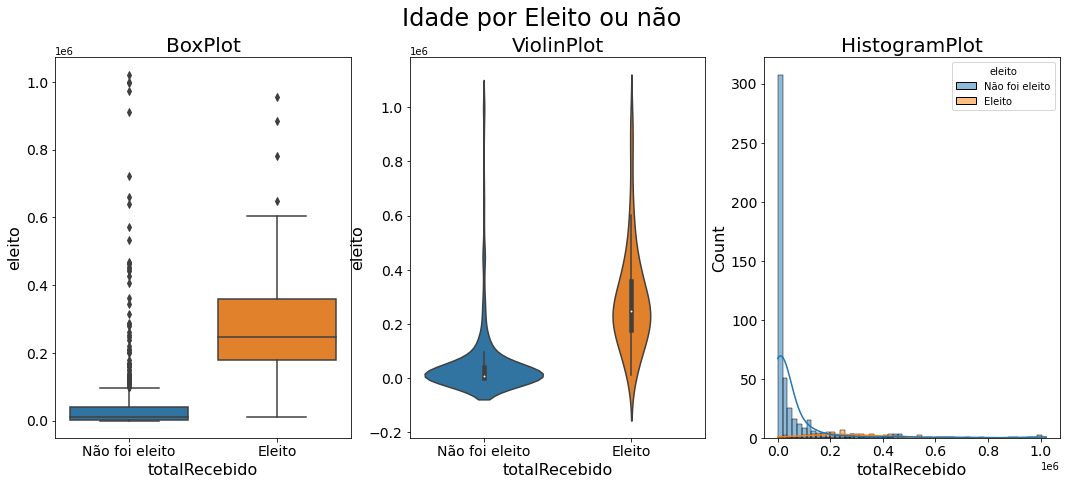

In [30]:
describe_y_classify_numeric_feature(
    df_deputado_info.query('Ocupação == "Deputado" '), 'totalRecebido', 'eleito', 'Análise numerica de gastos de campnaha')

## HeatMap

<AxesSubplot:>

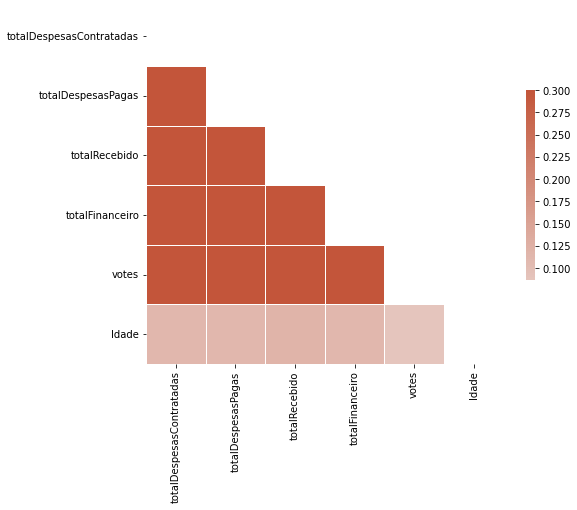

In [35]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Compute the correlation matrix
corr = df_deputado_info.drop([
    'nrPartido', 'idCandidato', 'idIBGE', 'Número', 'nrCandidato'
], axis='columns').corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(8, 7))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

## Scatter Plot

In [36]:
def scatter_corr_money_votes(money_feat, adf=df_deputado_info):
    fig = px.scatter(df_deputado_info, x=money_feat, y="votes",
                     color="eleito",
                     hover_data=['nrCandidato', 'eleito', 'Nome na urna', 'nrPartido'],
                     trendline="ols",
                     title= money_feat + " vs Votes")
    fig.show()

In [37]:
scatter_corr_money_votes('totalRecebido')

## Custo por Voto

Quem tem CustoVoto < 1 significa que A qtd de voto foi menor que o investido, na razaô 1 voto = 1R$

**Quanto maior CustoVoto significa que é mais eficiente**

+ Ex: se CustoVoto = 9.0 significa que investindo R\\$ 1,00 retorno 9 votos
+ Ex: se CustoVoto = 0.5 sifnifica que precisa de R\\$ 2,00 para conseguir um voto

**Melhor Custo Voto de Eleito**

**==> Capitao Aldean**
+ VotosPorCusto: 4,2 || Total Recebido: 9.000 || votos 39.000
+ Ele para cada R\\$1,00 voltou 4 votos
+ Para ter um voto precisa de R\\$0,23

**Pior Custo Voto de Eleito**

**==> Fabiola Mansur**
+ VotosPorCusto: 0.07 || total recebido 782.690,11 || votos: 54.444
+ Para cada R\\$1,00 voltou 0,07 votos
+ Para ter um voto precisa de R\\$14,30 +-


In [167]:
df_deputado_info['VotosPor1Real'] = df_deputado_info['votes'] / df_deputado_info['totalRecebido']
df_deputado_info['VotosPor1Real'].head()

0    NaN
1   0.03
2   0.26
3   0.18
4   0.09
Name: VotosPor1Real, dtype: float64

In [175]:
def return_four_rows_max_min_elected(adf, colum):
    temp_df = adf[colum]
    temp_df_elected = adf[ adf['eleito'] == 'Eleito']
    temp_df_not_elected = adf[ adf['eleito'] != 'Eleito']
    list_cols = ['Nome na urna', 'nrPartido', 'siglaPartido', 'eleito', 'totalRecebido', 'VotosPor1Real', 'votes']
    
    print('Max {} - All'.format(colum) )
    max_all = adf[ temp_df == temp_df.max() ]
    display(max_all[list_cols])
    
    print('Min {} - All'.format(colum) )
    max_all = adf[ temp_df == temp_df.min() ]
    display(max_all[list_cols])
    
    print('Max {} - Elected'.format(colum) )
    max_all = temp_df_elected[ temp_df_elected[colum] == temp_df_elected[colum].max() ]
    display(max_all[list_cols])
    
    print('Min {} - Elected'.format(colum) )
    max_all = temp_df_elected[ temp_df_elected[colum] == temp_df_elected[colum].min() ]
    display(max_all[list_cols])
    
    print('Max {} - Not Elected'.format(colum) )
    max_all = temp_df_not_elected[ temp_df_not_elected[colum] == temp_df_not_elected[colum].max() ]
    display(max_all[list_cols])
    
    print('Min {} - Not Elected'.format(colum) )
    max_all = temp_df_not_elected[ temp_df_not_elected[colum] == temp_df_not_elected[colum].min() ]
    display(max_all[list_cols])

In [176]:
return_four_rows_max_min_elected(df_deputado_info, 'VotosPor1Real')

Max VotosPor1Real - All


Nome na urna  nrPartido siglaPartido          eleito  totalRecebido  VotosPor1Real  votes
187  Enderson Guinho         12          PDT  Não foi eleito        1000.00          13.56  13562

Min VotosPor1Real - All


Nome na urna  nrPartido   siglaPartido          eleito  totalRecebido  VotosPor1Real  votes
28      Alfredo Boa Sorte         50           PSOL  Não foi eleito       11111.11           0.00      0
74                Brandão         44            PRP  Não foi eleito         100.00           0.00      0
78           Cabo Herling         28           PRTB  Não foi eleito         750.00           0.00      0
99   Celinalva de Almeida         50           PSOL  Não foi eleito        1725.00           0.00      0
130          Daniel Brito         17            PSL  Não foi eleito        1500.00           0.00      0
132         Daniel Santos         77  SOLIDARIEDADE  Não foi eleito        5222.50           0.00      0
165    Edileuza de Miltão         10            PRB  Não foi eleito       56959.00           0.00      0
175          Edson Dantas         14            PTB  Não foi eleito        4000.00           0.00      0
199           Fabio Silva         36            PTC  Não foi eleito         100.00           0.00      0
214               Geonias         40            PSB  Não foi eleito        1917.00           0.00      0
225              Gordinho         77  SOLIDARIEDADE  Não foi eleito       20000.00           0.00      0
266          Jair Santana         17            PSL  Não foi eleito        1300.00           0.00      0
277       Joabson Pereira         36            PTC  Não foi eleito         612.85           0.00      0
315                Kikito         23            PPS  Não foi eleito        6101.00           0.00      0
324         Leo de Garcia         31            PHS  Não foi eleito        3000.00           0.00      0
366       Maria de Fatima         36            PTC  Não foi eleito         100.00           0.00      0
435           Paulo Regis         36            PTC  Não foi eleito         663.08           0.00      0
518        Sandra Santana         15            MDB  Não foi eleito       50000.00           0.00      0
542     Subtenente Radson         17            PSL  Não foi eleito        3002.50           0.00      0

Max VotosPor1Real - Elected


Nome na urna  nrPartido siglaPartido  eleito  totalRecebido  VotosPor1Real  votes
85  Capitao Alden         17          PSL  Eleito        9418.54           4.22  39732

Min VotosPor1Real - Elected


Nome na urna  nrPartido siglaPartido  eleito  totalRecebido  VotosPor1Real  votes
196  Fabiola Mansur         40          PSB  Eleito      782690.11           0.07  54444

Max VotosPor1Real - Not Elected


Nome na urna  nrPartido siglaPartido          eleito  totalRecebido  VotosPor1Real  votes
187  Enderson Guinho         12          PDT  Não foi eleito        1000.00          13.56  13562

Min VotosPor1Real - Not Elected


Nome na urna  nrPartido   siglaPartido          eleito  totalRecebido  VotosPor1Real  votes
28      Alfredo Boa Sorte         50           PSOL  Não foi eleito       11111.11           0.00      0
74                Brandão         44            PRP  Não foi eleito         100.00           0.00      0
78           Cabo Herling         28           PRTB  Não foi eleito         750.00           0.00      0
99   Celinalva de Almeida         50           PSOL  Não foi eleito        1725.00           0.00      0
130          Daniel Brito         17            PSL  Não foi eleito        1500.00           0.00      0
132         Daniel Santos         77  SOLIDARIEDADE  Não foi eleito        5222.50           0.00      0
165    Edileuza de Miltão         10            PRB  Não foi eleito       56959.00           0.00      0
175          Edson Dantas         14            PTB  Não foi eleito        4000.00           0.00      0
199           Fabio Silva         36            PTC  Não foi eleito         100.00           0.00      0
214               Geonias         40            PSB  Não foi eleito        1917.00           0.00      0
225              Gordinho         77  SOLIDARIEDADE  Não foi eleito       20000.00           0.00      0
266          Jair Santana         17            PSL  Não foi eleito        1300.00           0.00      0
277       Joabson Pereira         36            PTC  Não foi eleito         612.85           0.00      0
315                Kikito         23            PPS  Não foi eleito        6101.00           0.00      0
324         Leo de Garcia         31            PHS  Não foi eleito        3000.00           0.00      0
366       Maria de Fatima         36            PTC  Não foi eleito         100.00           0.00      0
435           Paulo Regis         36            PTC  Não foi eleito         663.08           0.00      0
518        Sandra Santana         15            MDB  Não foi eleito       50000.00           0.00      0
542     Subtenente Radson         17            PSL  Não foi eleito        3002.50           0.00      0

In [181]:
fig = px.scatter(df_deputado_info,
                 x='VotosPor1Real', y="votes",
                 color='eleito',
                 hover_data=['nrCandidato', 'eleito', 'Nome na urna', 'nrPartido', 'totalRecebido'],
                 trendline="ols",
                 title= 'Custo de Votos x Votos x Quem foi eleito')
fig.show()

In [177]:
fig = px.scatter(df_deputado_info,
                 x='totalRecebido', y="VotosPor1Real",
                 color='eleito',
                 hover_data=['nrCandidato', 'eleito', 'Nome na urna', 'nrPartido'],
                 trendline="ols",
                 title= 'Campanha X CustoPorVoto')
fig.show()

### Custo Por Voto por voto


Quem teve melhor CustoPorVoto, ou seja, mais eficiente são os candidato que não foram eleitos. 


In [184]:
fig = px.scatter(df_deputado_info,
                 x='votes', y="VotosPor1Real",
                 color='eleito',
                 hover_data=['nrCandidato', 'eleito', 'Nome na urna', 'nrPartido'],
                 trendline="ols",
                 title= 'Campanha X Voto para quem gastou menos de 50k')
fig.show()

### Custo Por Voto por faixa de arrecadação

Tanto para menod de 50k quanto para mais de 50k há uma correlaçâo negativa:

**Quanto mais gasto mais ineficiente**

In [183]:
fig = px.scatter(df_deputado_info.query('totalRecebido < 50000'),
                 x='totalRecebido', y="VotosPor1Real",
                 color='eleito',
                 hover_data=['nrCandidato', 'eleito', 'Nome na urna', 'nrPartido'],
                 trendline="ols",
                 title= 'Campanha X CustoPorVoto para quem gastou menos de 50k')
fig.show()

In [185]:
fig = px.scatter(df_deputado_info.query('totalRecebido > 50000'),
                 x='totalRecebido', y="VotosPor1Real",
                 color='eleito',
                 hover_data=['nrCandidato', 'eleito', 'Nome na urna', 'nrPartido'],
                 trendline="ols",
                 title= 'Campanha X CustoPorVoto para quem gastou mais de 50k')
fig.show()

## Quanto Dinheiro Moveu a elição

In [72]:
def cast_float_to_money(anumber):
    return "R$ {:,.2f}".format(anumber).replace(
        ',','x').replace('.',',').replace('x','.')

def cast_float_to_br_float(anumber):
    return "{:,.2f}".format(anumber).replace(
        ',','x').replace('.',',').replace('x','.')

In [34]:
cast_float_to_money(df_deputado_info['totalRecebido'].sum())

'R$ 44.095.168,80'

### Quem moveu mais ganhou? e que ganhou?

Percebe-se que: mesmo investindo tanto dinheiro quanto um candidato que ganhou, não é ainda causa suficiente para anhar eleição  

Deputado está como uma das ocupações que mais gastaram em campanha

In [241]:
import plotly.express as px

fig = px.bar(df_deputado_info.sort_values(
                'totalRecebido', ascending=False).head(20),
             color='eleito',
             hover_data=['siglaPartido', 'eleito', 'Nome na urna', 'nrPartido', 'votes','Ocupação'],
             x='Nome na urna',
             y='totalRecebido',
           )
fig.show()

In [242]:
df_deputado_info.sort_values(
    'totalRecebido', ascending=False).head(20)['Ocupação'].value_counts()

Deputado                                6
Empresário                              4
Administrador                           3
Agricultor                              2
Advogado                                1
Médico                                  1
Jornalista e Redator                    1
Professor de Ensino Médio               1
Aposentado (Exceto Servidor Público)    1
Name: Ocupação, dtype: int64

## Análise do gasto de campanha

Quem se elegeu teve média maior do que quem não se elegiu. Indicando a importnacia de investir dinheiro.

Apesar disso, houve casos nos nao eleitos (outiliers) que mesmo gastando mais não conseguiram

In [91]:
main_columns_show = ['siglaPartido', 'eleito', 'Nome na urna', 'nrPartido', 'votes', 'totalRecebido']

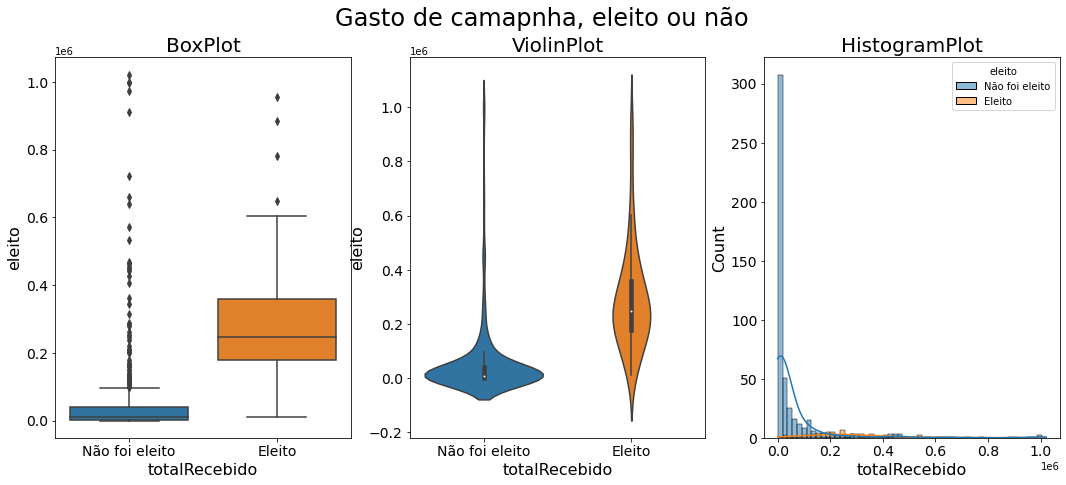

In [39]:
describe_y_classify_numeric_feature(
    df_deputado_info, 'totalRecebido', 'eleito', 'Gasto de camapnha, eleito ou não')

# Perfil de quem conseguiu se eleger

## Arrecadação

+ Q3 (75%) de quem nao se elegeu é de 75% R\\$ 39.539,00
+ Q1 (25%) de quem se elegiu é de R\\$ 177.861,35

**Conclusão**
+ O mínimo necessário para se ter uma boa chance de ganhar é gastando entre R\\$ 180.000 à R\\$ 360.000 para ter boas chances de se eleger, cerca 30% (Q1 e Q3 de do boxplot quem foi eleito).
  - Acima deisso aumenta as chances mas não muito. Gastando acima de 360k aumenta para 45%)
  - Abaixo disso é bem pouco cerca de 1%


In [67]:
def describe_numeric_optimized(adf, y_target, colx, float_format_func):
    df_aux = adf.query('eleito == "' + y_target + '"')[colx].describe().to_frame().reset_index()
    for i, row in df_aux.iterrows():
        if row['index'] != 'count':
            df_aux.at[i , colx] = float_format_func(row[colx])
    return df_aux

In [89]:
print('Arrecadação de quem se elegeu')
describe_numeric_optimized(
    df_deputado_info, 'Eleito', 'totalRecebido', cast_float_to_money)

Arrecadação de quem se elegeu


index  totalRecebido
0  count          63.00
1   mean  R$ 287.714,26
2    std  R$ 190.709,45
3    min    R$ 9.418,54
4    25%  R$ 177.861,35
5    50%  R$ 247.465,89
6    75%  R$ 357.427,00
7    max  R$ 954.196,61

In [71]:
print('Arrecadação de quem se NÃO se elegeu')
describe_numeric_optimized(
    df_deputado_info, 'Não foi eleito', 'totalRecebido', cast_float_to_money)

Arrecadação de quem se NÃO se elegeu


index    totalRecebido
0  count           481.00
1   mean     R$ 53.989,96
2    std    R$ 136.011,14
3    min         R$ 50,00
4    25%      R$ 1.640,11
5    50%      R$ 8.934,54
6    75%     R$ 39.539,00
7    max  R$ 1.021.698,42

In [127]:
fig = px.violin(df_deputado_info,
                x="eleito",
                y="totalRecebido",
                box=True, 
                hover_data=main_columns_show,
                title='ViolinPlot de arrecadação para quem foi ou não eleito')
fig.show()

In [128]:
print('Quem se elegeu com menos dinheiro')
df_deputado_info.query('eleito == "Eleito"').sort_values('totalRecebido').head(20)[main_columns_show]

Quem se elegeu com menos dinheiro


siglaPartido  eleito      Nome na urna  nrPartido   votes  totalRecebido
85           PSL  Eleito     Capitao Alden         17   39732        9418.54
547          PSL  Eleito   Talita Oliveira         17   26096       26662.54
423        PATRI  Eleito        Pastor Tom         51   29335       29246.11
153         PSDB  Eleito     Dr.david Rios         45   49504       48562.50
230         PSOL  Eleito     Hilton Coelho         50   35733       62221.00
609      PC do B  Eleito                Zó         65   43347       88658.59
516          PDT  Eleito     Samuel Junior         12   63951       99950.00
302          PHS  Eleito      Junior Muniz         31   21058      107385.15
201           PT  Eleito      Fátima Nunes         13   69663      117641.23
351          PSB  Eleito  Marcelinho Veiga         40   70612      127530.00
304          PRP  Eleito  Jurandy Oliveira         44   47432      130553.20
280       AVANTE  Eleito     Joao Isidorio         70  110540      131837.80
319          PSC  Eleito   Laerte do Vando         20   55007      141728.19
494          PDT  Eleito    Roberto Carlos         12   69440      151736.70
604           PP  Eleito           Zé Cocá         11   59380      162787.05
353         PSDB  Eleito    Marcell Moraes         45   64219      171500.00
412           PT  Eleito              Osni         13   46212      184222.71
402           PT  Eleito      Neusa Cadore         13   51835      185150.65
440          DEM  Eleito     Pedro Tavares         25   64272      194054.10
2             PP  Eleito    Aderbal Caldas         11   51480      198968.60

### Análise de quem gastou mais de 40K

Acima de 40k gastos (Q3 de não eleito), houve pessoa que não se elegeram

In [111]:
df_temp_money = df_deputado_info.query('totalRecebido > 40000')

In [112]:
fig = px.violin(df_temp_money,
                x="eleito",
                y="totalRecebido",
                box=True, 
                hover_data=main_columns_show,
                title='Dinheiro de campanha')
fig.show()

In [113]:
# Pois acima de 40k É O Q3 de não-eleito, e teve muita gente abaixo disso que torna difícil a análise
print('Hitograma para que gastou mais de 40k (Q3 de não-eleito)')
fig = px.histogram(df_temp_money, x="totalRecebido", color="eleito",
                   marginal="box", # or violin, rug
                   hover_data=main_columns_show)
fig.show()

Hitograma para que gastou mais de 40k (Q3 de não-eleito)


### Quantos foram eleitos por faixas de gastos

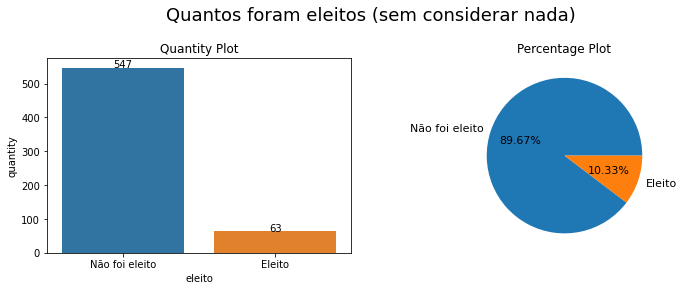

In [129]:
eda_categ_feat_desc_plot(
    df_deputado_info['eleito'],
    title = "Quantos foram eleitos (sem considerar nada)",
)

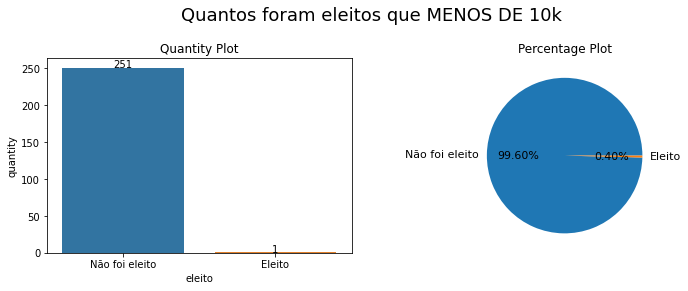

In [116]:
df_temp_money = df_deputado_info.query('totalRecebido < 10000')

eda_categ_feat_desc_plot(df_temp_money['eleito'],
                         title = "Quantos foram eleitos que gastaram MENOS DE 10k",
                         )

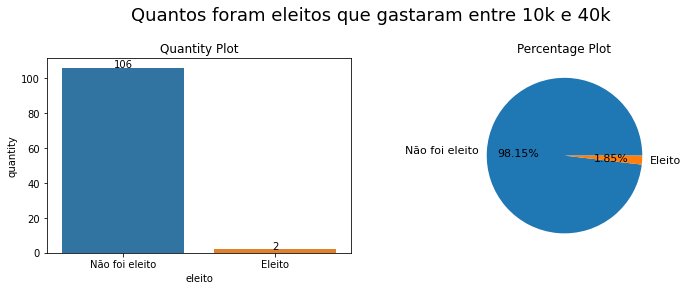

In [115]:
df_temp_money = df_deputado_info.query('totalRecebido < 40000 and totalRecebido > 10000')

eda_categ_feat_desc_plot(df_temp_money['eleito'],
                         title = "Quantos foram eleitos que gastaram entre 10k e 40k",
                         )

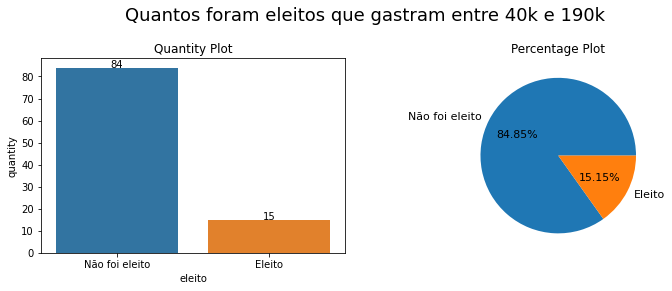

In [118]:
eda_categ_feat_desc_plot(
    df_deputado_info.query('totalRecebido > 40000 and totalRecebido < 190000')['eleito'],
    title = "Quantos foram eleitos que gastram entre 40k e 190k",
)

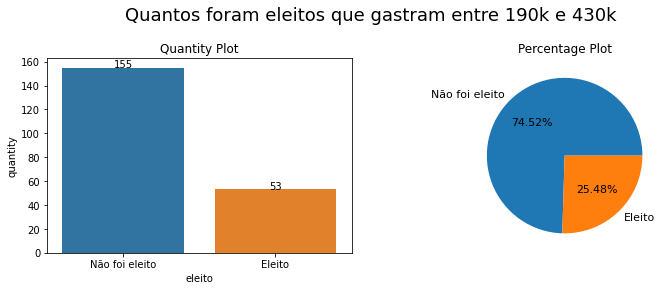

In [122]:
df_temp_money = df_deputado_info.query('totalRecebido > 19000 and totalRecebido < 430000')

eda_categ_feat_desc_plot(df_temp_money['eleito'],
                         title = "Quantos foram eleitos que gastram entre 190k e 430k",
                         )

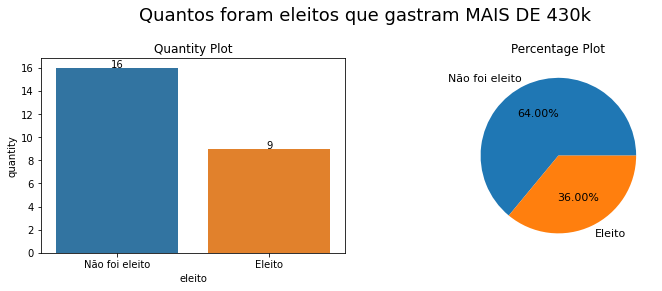

In [124]:
df_temp_money = df_deputado_info.query('totalRecebido > 430000 ')

eda_categ_feat_desc_plot(df_temp_money['eleito'],
                         title = "Quantos foram eleitos que gastram MAIS DE 430k",
                         )

### Quantos foram eleitos pelas faixas do BoxPlot de Eleito

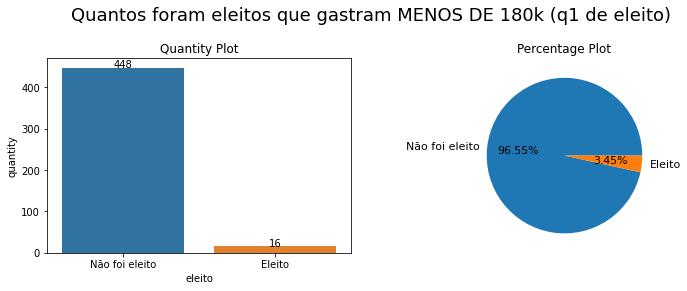

In [125]:
eda_categ_feat_desc_plot(
    df_deputado_info.query('totalRecebido < 180000')['eleito'],
    title = "Quantos foram eleitos que gastram MENOS DE 180k (q1 de eleito)",
)

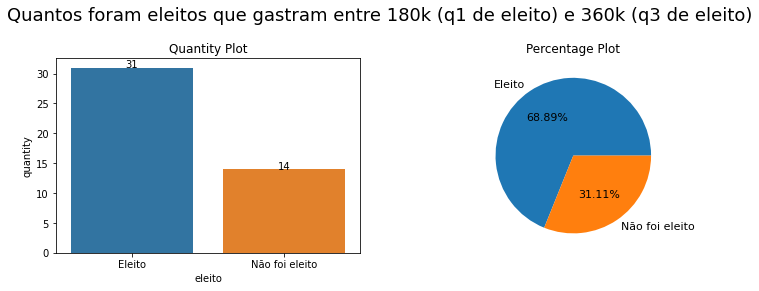

In [121]:
eda_categ_feat_desc_plot(
    df_deputado_info.query('totalRecebido > 180000 and totalRecebido < 360000')['eleito'],
    title = "Quantos foram eleitos que gastram entre 180k (q1 de eleito) e 360k (q3 de eleito)",
)

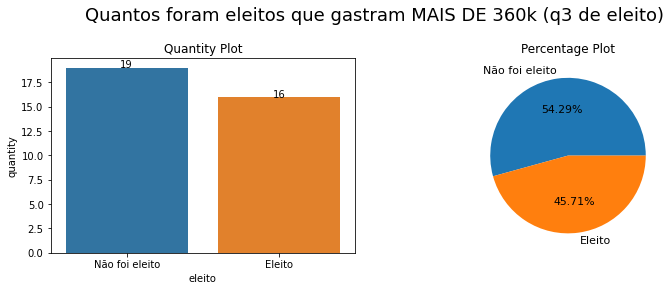

In [123]:
eda_categ_feat_desc_plot(
    df_deputado_info.query('totalRecebido > 360000')['eleito'],
    title = "Quantos foram eleitos que gastram MAIS DE 360k (q3 de eleito)",
)

## Votos

+ O max de votos do NÃO eleito é de 46.500.
+ O q1 (ou seja, a psoição 25%) dos eleitos é de 49.000
+ O mínimo de votos de quem se elegeu é de 21.000

**Conclusão**
+ Para se eleger com certeza, aproximadamente 50.000 votos
+ O Mínimo para PODER se eleger é de 20.000 votos
+ Entre 20.00 votos e 47.000 votos  há uma chance de 20%

In [73]:
print('Quantidade de votos quem se elegeu')
describe_numeric_optimized(
    df_deputado_info, 'Eleito', 'votes', cast_float_to_br_float)

Arrecadação de quem se elegeu


index       votes
0  count       63.00
1   mean   59.868,38
2    std   17.700,47
3    min   21.058,00
4    25%   49.626,50
5    50%   57.735,00
6    75%   66.536,00
7    max  110.540,00

In [88]:
print('Quem foi eleito com menos votos e que teria chances de nao consguir')
df_deputado_info.query('eleito == "Eleito"').sort_values('votes').head(10)[main_columns_show]

Quem foi eleito com menos votos e que teria chances de nao consguir


siglaPartido  eleito     Nome na urna  nrPartido  votes
302          PHS  Eleito     Junior Muniz         31  21058
547          PSL  Eleito  Talita Oliveira         17  26096
313          MDB  Eleito   Katia Oliveira         15  27206
423        PATRI  Eleito       Pastor Tom         51  29335
230         PSOL  Eleito    Hilton Coelho         50  35733
85           PSL  Eleito    Capitao Alden         17  39732
574          PSC  Eleito              Tum         20  40632
609      PC do B  Eleito               Zó         65  43347
405           PP  Eleito         Niltinho         11  46174
412           PT  Eleito             Osni         13  46212

In [74]:
print('Quantidade de votos quem NÃO se elegeu')
describe_numeric_optimized(
    df_deputado_info, 'Não foi eleito', 'votes', cast_float_to_br_float)

Quantidade de votos quem NÃO se elegeu


index      votes
0  count     547.00
1   mean   4.518,68
2    std   9.269,38
3    min       0,00
4    25%     257,00
5    50%     766,00
6    75%   3.386,00
7    max  46.494,00

In [75]:
fig = px.violin(df_deputado_info,
                x="eleito",
                y="votes",
                box=True, 
                hover_data=main_columns_show,
                title='Votos')
fig.show()

In [ ]:
fig = px.scatter(df_deputado_info.query('eleito != "Eleito"'),
                 x='totalRecebido', y="votes",
                 color='VotosPor1Real',
                 hover_data=['nrCandidato', 'eleito', 'Nome na urna', 'nrPartido'],
                 trendline="ols",
                 title= 'Custo de Votos e $ e votos de quem NAO elegeu')
fig.show()

### Análise entre 20k a 47k votos

In [84]:
df_temp_votes = df_deputado_info.query('votes > 20000 and votes < 47000')

In [85]:
fig = px.violin(df_temp_votes,
                x="eleito",
                y="votes",
                box=True, 
                hover_data=main_columns_show,
                title='Dinheiro de campanha')
fig.show()

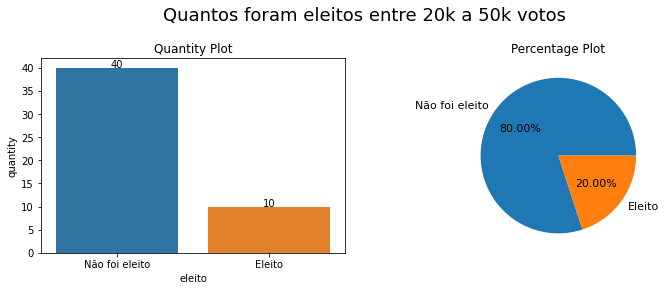

In [87]:
eda_categ_feat_desc_plot(df_temp_votes['eleito'],
                         title = "Quantos foram eleitos entre 20k a 47k votos",
                         )

## Dados Pessoais

In [131]:
df_deputado_info.head(1)

nrPartido                         nomePartido siglaPartido  idCandidato  totalDespesasContratadas  totalDespesasPagas  totalRecebido  totalFinanceiro       idIBGE  nrCandidato            deputado_url          eleito  votes votes%                                  votes_by_city_url                                                img                 nomeCompleto                                               desc      Nome na urna       Sexo  Idade Data de nascimento                               Ocupação      Grau de instrução Estado Civil Cor/Raça Município de nascimento  Número Situação da candidatura Estado                                   Partido     Coligação              Composição
0         31  Partido Humanista da Solidariedade          PHS  50000606390                       NaN                 NaN            NaN              NaN  50000606390        31168  abraao-joviniano-31168  Não foi eleito    700  0,01%  https://especiais.gazetadopovo.com.br/eleicoes...  https://cdn-eleicoes.gazetadopovo.com.br/fotos...  Abraao Joviniano dos Santos  Casado(a),  Auxiliar de Escritório e Assemelha...  Abraao Joviniano  Masculino     53         15/05/1968  Auxiliar de Escritório e Assemelhados  Ensino Médio completo    Casado(a)    Parda             Salvador-BA   31168                Deferido  BAHIA  PHS - Partido Humanista da Solidariedade  RENOVA BAHIA  PHS / PPS / PRTB / PSL

In [130]:
df_describe_y_class_binary_by_cat_feats(
    df_deputado_info, 'Cor/Raça', 'eleito', 'Eleito').head(2)

Cor/Raça  qtd_total percentage_total  qtd_yes  qtd_no percentage_val_yes percentage_val_no
0   Branca        146           23.93%       34     112             23.29%            76.71%
1    Parda        311           50.98%       22     289              7.07%            92.93%

In [136]:
df_describe_y_class_binary_by_cat_feats(
    df_deputado_info, 'siglaPartido', 'eleito', 'Eleito').head(4)

siglaPartido  qtd_total percentage_total  qtd_yes  qtd_no percentage_val_yes percentage_val_no
0          PSD         13            2.13%        9       4             69.23%            30.77%
1       AVANTE          2            0.33%        1       1             50.00%            50.00%
2           PP         15            2.46%        7       8             46.67%            53.33%
3           PT         26            4.27%       10      16             38.46%            61.54%

In [133]:
df_describe_y_class_binary_by_cat_feats(
    df_deputado_info, 'Sexo', 'eleito', 'Eleito').head(2)

Sexo  qtd_total percentage_total  qtd_yes  qtd_no percentage_val_yes percentage_val_no
0  Masculino        427           70.00%       53     374             12.41%            87.59%
1   Feminino        183           30.00%       10     173              5.46%            94.54%

In [135]:
df_describe_y_class_binary_by_cat_feats(
    df_deputado_info, 'Estado Civil', 'eleito', 'Eleito').head(4)

Estado Civil  qtd_total percentage_total  qtd_yes  qtd_no percentage_val_yes percentage_val_no
0       Viúvo(a)          8            1.31%        1       7             12.50%            87.50%
1      Casado(a)        313           51.31%       39     274             12.46%            87.54%
2  Divorciado(a)         70           11.48%        8      62             11.43%            88.57%
3    Solteiro(a)        219           35.90%       15     204              6.85%            93.15%

In [138]:
df_describe_y_class_binary_by_cat_feats(
    df_deputado_info, 'Grau de instrução', 'eleito', 'Eleito').head(2)

Grau de instrução  qtd_total percentage_total  qtd_yes  qtd_no percentage_val_yes percentage_val_no
0  Superior incompleto         62           10.16%       11      51             17.74%            82.26%
1    Superior completo        268           43.93%       38     230             14.18%            85.82%